In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# EX 5 

In [3]:
default = pd.read_csv('data/default.csv')
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
labeler = LabelEncoder()

In [5]:
X = default[['balance', 'income']]
y = labeler.fit_transform(default['default'])

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9676

In [7]:
cross_val_score(model, X, y, cv=3)

array([0.97360528, 0.97149715, 0.96579658])

In [8]:
X1 = default.drop(['default'], axis=1)
y1 = labeler.fit_transform(default['default'])

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)

In [9]:
cat_feat = ['student']
num_feat = ['balance', 'income']

num_process = StandardScaler()
cat_process = OneHotEncoder(drop='if_binary')

preprocess = ColumnTransformer([('cat', cat_process, cat_feat), 
                                ('num', num_process, num_feat)])

X1_train_process = preprocess.fit_transform(X1_train)
X1_test_process = preprocess.transform(X1_test)

In [10]:
model = LogisticRegression()
model.fit(X1_train_process, y1_train)
model.score(X1_test_process, y1_test)

0.974

In [11]:
model_pipe = make_pipeline(preprocess, model)
cross_val_score(model_pipe, X1, y1, cv=3)

array([0.97360528, 0.97209721, 0.97239724])

# EX 6 

In [12]:
import statsmodels.api as sm

In [13]:
model = sm.Logit(y, X).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.173456
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: -0.188   
Dependent Variable: y                AIC:              3473.1110
Date:               2021-09-16 17:09 BIC:              3487.5316
No. Observations:   10000            Log-Likelihood:   -1734.6  
Df Model:           1                LL-Null:          -1460.3  
Df Residuals:       9998             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
balance      0.0004    0.0001    5.7968  0.0000   0.0003   0.0005
income      -0.0001    0.0000  -34.0249  0.0000  -0.0001  -0.0001
================================================================

"""

In [42]:
def bootstrap(X, y):
    
    n = len(X)
    idx_choose = np.random.choice(X.index, n)
    X1 = X.iloc[idx_choose]
    y1 = y[idx_choose]
    
    model = sm.Logit(y1, X1).fit(disp=False)
    return model.params.values

In [43]:
coef = bootstrap(X, y)
coef

array([ 0.00040147, -0.00012752])

In [62]:
def boot(X, y, n=1000):
    coef_boot = np.zeros((n, X.shape[1]))
    for i in range(n):
        coef_boot[i] = bootstrap(X, y)
        
    
    return coef_boot

In [63]:
coef_boot = boot(X, y)

In [64]:
np.std(coef_boot, axis=0)

array([6.70639291e-05, 3.96458242e-06])

<AxesSubplot:ylabel='Count'>

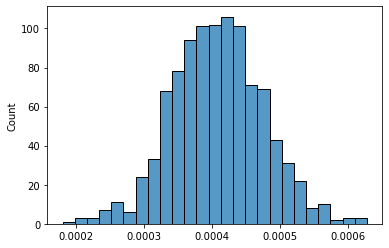

In [71]:
sns.histplot(coef_boot[:, 0])

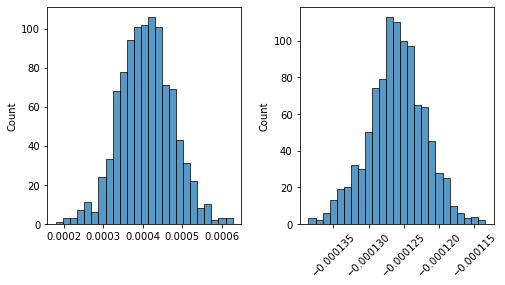

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3)

sns.histplot(coef_boot[:, 0], ax=axes[0])
sns.histplot(coef_boot[:, 1], ax=axes[1])

plt.xticks(rotation=45)
plt.show()